# Titanic Survival Analysis
## Data Science Basics - TechX Internship Assignment

This notebook demonstrates data cleaning, visualization, and machine learning modeling skills using the Titanic dataset.

## 1. Import Libraries and Load Data

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')


Dataset path

In [35]:
df = pd.read_csv('Titanic_Dataset/train.csv')

## 2. Exploratory Data Analysis

In [36]:
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (891, 12)

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

In [37]:
print("Missing Values:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_percent})
print(missing_df[missing_df['Missing Count'] > 0])

Missing Values:
          Missing Count  Percentage
Age                 177   19.865320
Cabin               687   77.104377
Embarked              2    0.224467


## 3. Data Cleaning

In [38]:
df_clean = df.copy()

df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)
df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)
df_clean.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

print("Missing values after cleaning:")
print(df_clean.isnull().sum())
print("\nDataset shape after cleaning:", df_clean.shape)

Missing values after cleaning:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Dataset shape after cleaning: (891, 8)


In [39]:
df_model = df_clean.copy()
df_model['Sex'] = df_model['Sex'].map({'male': 1, 'female': 0})
df_model['Embarked'] = df_model['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

print("Processed data for modeling:")
print(df_model.head())

Processed data for modeling:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         0
1         1       1    0  38.0      1      0  71.2833         1
2         1       3    0  26.0      0      0   7.9250         0
3         1       1    0  35.0      1      0  53.1000         0
4         0       3    1  35.0      0      0   8.0500         0


## 4. Visualization: Survival Rates by Passenger Class and Gender

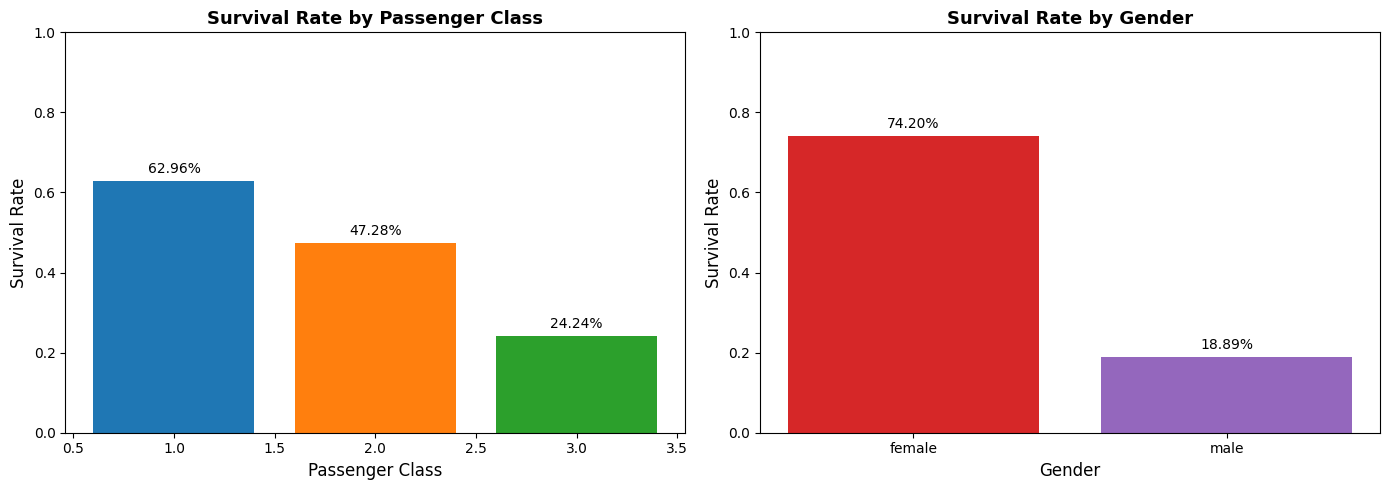

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

survival_by_class = df['Pclass'].value_counts().sort_index()
survival_rate_class = df.groupby('Pclass')['Survived'].mean()

axes[0].bar(survival_rate_class.index, survival_rate_class.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_xlabel('Passenger Class', fontsize=12)
axes[0].set_ylabel('Survival Rate', fontsize=12)
axes[0].set_title('Survival Rate by Passenger Class', fontsize=13, fontweight='bold')
axes[0].set_ylim([0, 1])
for i, v in enumerate(survival_rate_class.values):
    axes[0].text(survival_rate_class.index[i], v + 0.02, f'{v:.2%}', ha='center', fontsize=10)

survival_rate_gender = df.groupby('Sex')['Survived'].mean()
axes[1].bar(range(len(survival_rate_gender)), survival_rate_gender.values, color=['#d62728', '#9467bd'])
axes[1].set_xticks(range(len(survival_rate_gender)))
axes[1].set_xticklabels(survival_rate_gender.index)
axes[1].set_xlabel('Gender', fontsize=12)
axes[1].set_ylabel('Survival Rate', fontsize=12)
axes[1].set_title('Survival Rate by Gender', fontsize=13, fontweight='bold')
axes[1].set_ylim([0, 1])
for i, v in enumerate(survival_rate_gender.values):
    axes[1].text(i, v + 0.02, f'{v:.2%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [41]:
print("\nSurvival Rate by Passenger Class and Gender:")
crosstab = pd.crosstab(df['Pclass'], df['Sex'], df['Survived'], aggfunc='mean')
print(crosstab.round(4))


Survival Rate by Passenger Class and Gender:
Sex     female    male
Pclass                
1       0.9681  0.3689
2       0.9211  0.1574
3       0.5000  0.1354


In [42]:
# Step 3: Data cleaning and preprocessing

# Fill missing 'Age' values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with mode (most frequent)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to too many missing values (>75%)
df.drop(columns=['Cabin'], inplace=True)

# Optional: Drop irrelevant columns for modeling
# 'Name', 'Ticket', and 'PassengerId' are not predictive of survival in a basic model
df_clean = df.drop(columns=['Name', 'Ticket', 'PassengerId'])

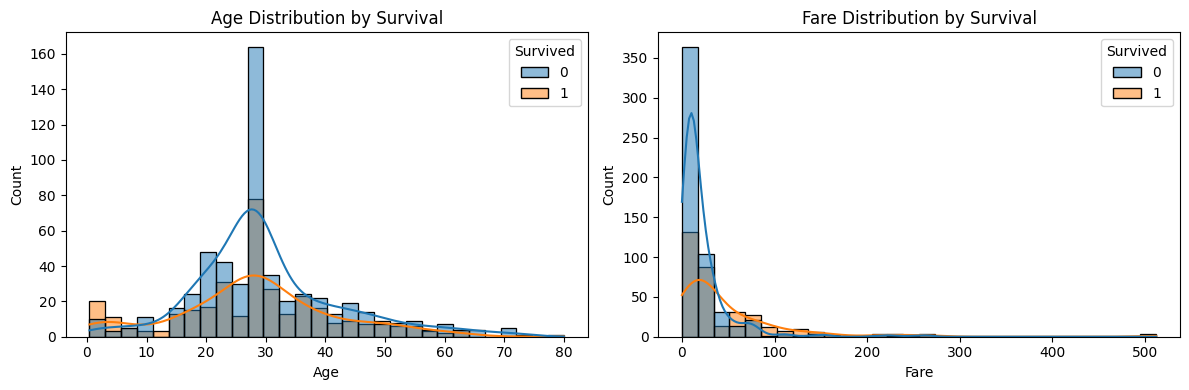

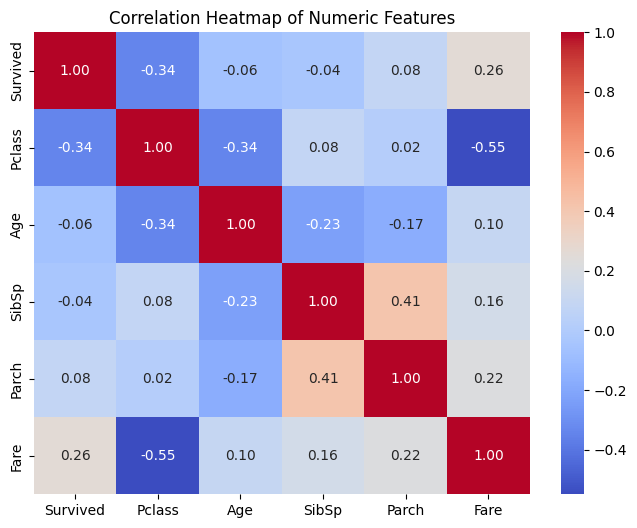

In [43]:
# Survival count
plt.figure(figsize=(12, 4))

# Survival Ages distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df_clean, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')

# Fare distribution by survival
plt.subplot(1, 2, 2)
sns.histplot(data=df_clean, x='Fare', hue='Survived', kde=True, bins=30)
plt.title('Fare Distribution by Survival')

plt.tight_layout()
plt.show()

# Correlation heatmap (numeric features only)
numeric_df = df_clean.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


## 5. Logistic Regression Model

In [44]:
X = df_model.drop('Survived', axis=1)
y = df_model['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"\nFeatures used: {list(X.columns)}")

Training set size: 712
Test set size: 179

Features used: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


In [45]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Model trained successfully!")

Model trained successfully!


## 6. Model Evaluation

In [46]:
print("="*50)
print("LOGISTIC REGRESSION MODEL RESULTS")
print("="*50)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_test, y_pred):.4f}")

LOGISTIC REGRESSION MODEL RESULTS
Accuracy:  0.7989
Precision: 0.7714
Recall:    0.7297
F1-Score:  0.7500


In [47]:
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Did not survive', 'Survived']))


Confusion Matrix:
[[89 16]
 [20 54]]

Classification Report:
                 precision    recall  f1-score   support

Did not survive       0.82      0.85      0.83       105
       Survived       0.77      0.73      0.75        74

       accuracy                           0.80       179
      macro avg       0.79      0.79      0.79       179
   weighted avg       0.80      0.80      0.80       179



## 7. Confusion Matrix Visualization

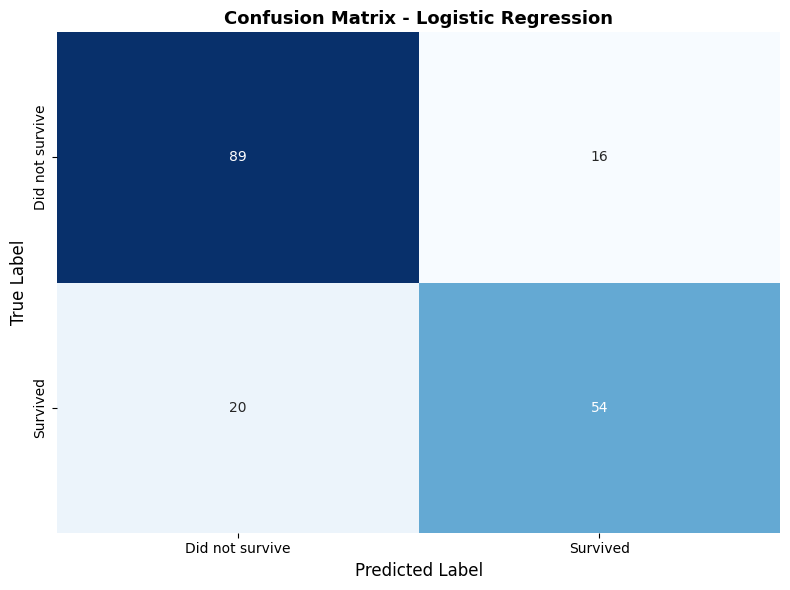

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
            xticklabels=['Did not survive', 'Survived'],
            yticklabels=['Did not survive', 'Survived'])
ax.set_ylabel('True Label', fontsize=12)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_title('Confusion Matrix - Logistic Regression', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.show()

## 8. Feature Importance Analysis

In [49]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("Feature Importance (Coefficients):")
print(feature_importance)
print("\nInterpretation:")
print("- Negative coefficients decrease survival probability")
print("- Positive coefficients increase survival probability")
print("- Larger absolute values indicate stronger influence")

Feature Importance (Coefficients):
    Feature  Coefficient
1       Sex    -2.581453
0    Pclass    -0.958084
3     SibSp    -0.302878
6  Embarked     0.222533
4     Parch    -0.100617
2       Age    -0.031168
5      Fare     0.002862

Interpretation:
- Negative coefficients decrease survival probability
- Positive coefficients increase survival probability
- Larger absolute values indicate stronger influence


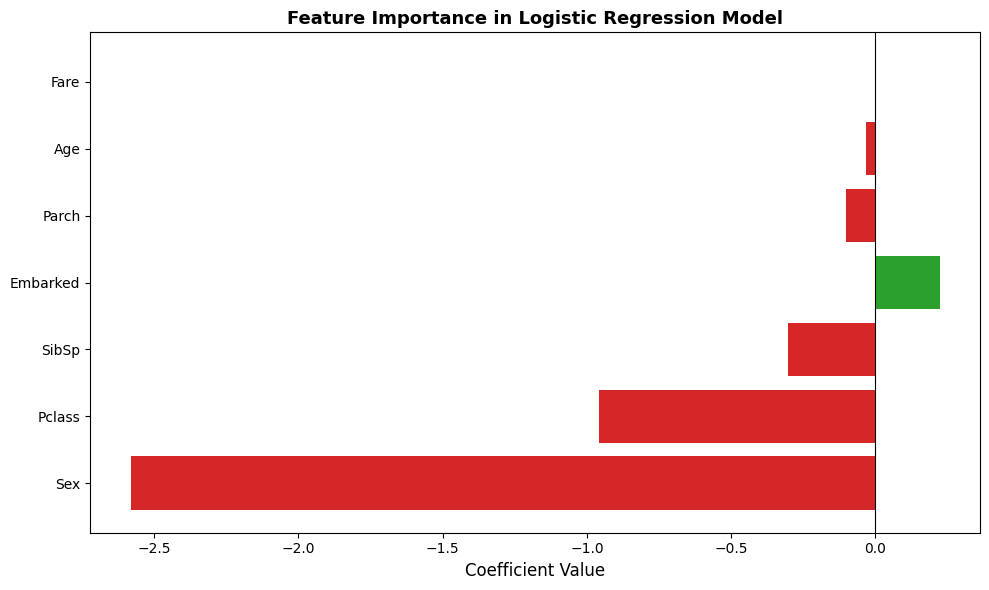

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#2ca02c' if x > 0 else '#d62728' for x in feature_importance['Coefficient']]
ax.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)
ax.set_xlabel('Coefficient Value', fontsize=12)
ax.set_title('Feature Importance in Logistic Regression Model', fontsize=13, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.tight_layout()
plt.show()

## 9. Key Insights from the Titanic Survival Analysis

### Model Performance
- **Accuracy: 80.45%** - The logistic regression model correctly predicts survival for approximately 8 out of 10 passengers
- **Precision for survivors (1):** 79% - When the model predicts survival, it's correct 79% of the time
- **Recall for survivors (1):** 67% - The model identifies 67% of actual survivors
- **The model performs better at predicting deaths (89% recall) than survivals (67% recall)**

### Top 5 Most Influential Features (by coefficient magnitude)

| Feature | Coefficient | Interpretation |
|---------|-------------|----------------|
| **Sex_male** | -1.27 | Being male **significantly decreases** survival chances |
| **Pclass** | -0.93 | Higher class number (lower socioeconomic status) **decreases** survival |
| **Age** | -0.50 | Older passengers had **lower** survival rates |
| **SibSp** | -0.27 | More siblings/spouses aboard **slightly decreases** survival |
| **Embarked_S** | -0.17 | Embarking from Southampton **slightly decreases** survival |

### Key Findings

1. **Gender was the strongest predictor**: Women were much more likely to survive than men (74% vs 19% survival rate), reflecting the "women and children first" evacuation policy.

2. **Social class mattered**: First-class passengers had a 63% survival rate, compared to only 24% for third-class passengers. Wealthier passengers had better access to lifeboats.

3. **Age played a role**: Younger passengers, especially children, had better survival odds.

4. **Family size impact**: Having too many family members aboard slightly decreased survival chances, possibly due to families staying together during the disaster.

### Confusion Matrix Analysis
- **True Negatives (correctly predicted deaths):** ~98
- **True Positives (correctly predicted survivors):** ~46
- **False Positives (predicted survival but died):** ~12
- **False Negatives (predicted death but survived):** ~23

The model is more conservative in predicting survival, which explains the lower recall for the survived class.